In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
zomato_df = pd.read_csv(r"D:\car insurance claim\zomato.csv")

In [3]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
zomato_df = zomato_df.drop(columns= ["url", "dish_liked", "phone"], axis= 1)

In [6]:
zomato_df.drop_duplicates(inplace= True)


In [7]:
zomato_df.dropna(how= "any", inplace= True)

In [8]:
zomato_df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [9]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [10]:
zomato_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
zomato_df = zomato_df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': "type", 'listed_in(city)': "city"})
zomato_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [12]:
zomato_df["cost"] = zomato_df["cost"].astype(str)

zomato_df["cost"] = zomato_df["cost"].apply(lambda x: x.replace(',', '.'))

zomato_df["cost"] = zomato_df["cost"].astype(float)

In [13]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [14]:
zomato_df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
zomato_df = zomato_df.loc[zomato_df.rate != 'NEW']
zomato_df = zomato_df.loc[zomato_df.rate != '-'].reset_index(drop= True)
remove_slash= lambda x: x.replace('/5', "") if type(x) == str else x
zomato_df.rate = zomato_df.rate.apply(remove_slash).str.strip().astype(float)

In [16]:
zomato_df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41232    3.7
41233    2.5
41234    3.6
41235    4.3
41236    3.4
Name: rate, Length: 41237, dtype: float64

In [17]:
zomato_df.name = zomato_df.name.apply(lambda x:x.title())
zomato_df.online_order.replace(("Yes", "No"), (True, False),inplace= True)
zomato_df.book_table.replace(("Yes", "No"), (True, False),inplace= True)
zomato_df.cost.unique()

C:\Users\sagar\AppData\Local\Temp\ipykernel_9492\3424526268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomato_df.online_order.replace(("Yes", "No"), (True, False),inplace= True)
C:\Users\sagar\AppData\Local\Temp\ipykernel_9492\3424526268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [52]:

zomato_df.head(2)


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [50]:
zomato_df.to_csv("zomato_df.csv")

In [18]:
# encode the input variables:
def encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(["rate", "cost","votes"])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = encode(zomato_df.copy())

In [19]:
zomato_en

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6532,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
41235,8786,6568,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

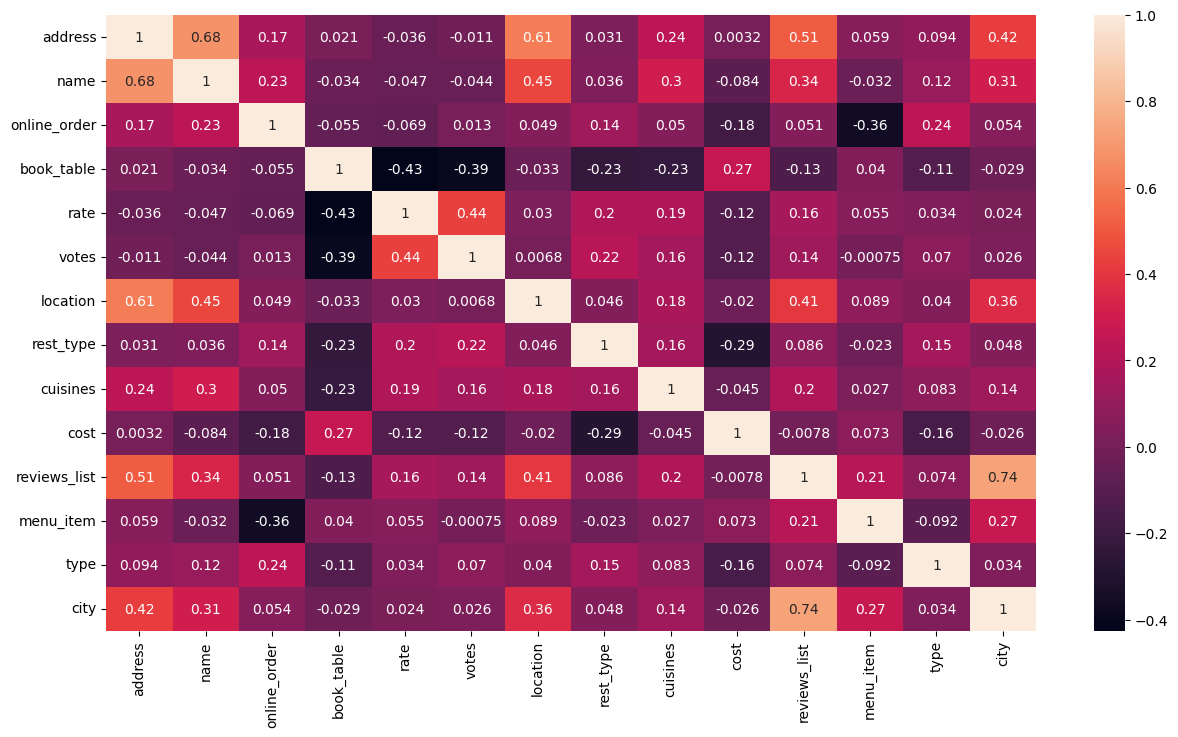

In [20]:
corr = zomato_en.corr(method= "pearson")
plt.figure(figsize=[15, 8])
sns.heatmap(corr, annot= True)
zomato_en.columns

# data visualisation

#### ● Restaurants delivering Online or not

Text(0.5, 1.0, 'Restaurants delivering Online or not')

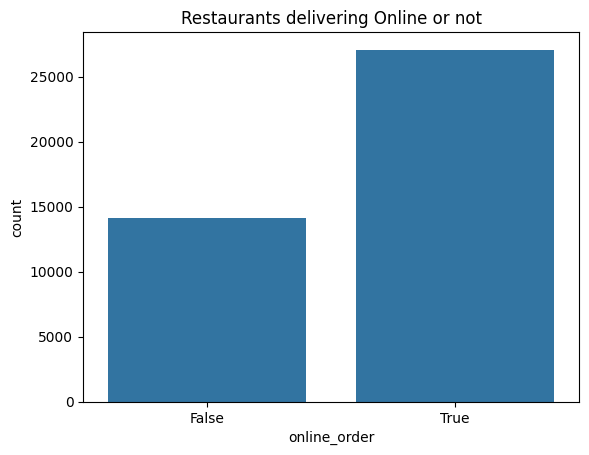

In [21]:
sns.countplot(x = zomato_df["online_order"])
fig = plt.gcf()
plt.title("Restaurants delivering Online or not")

#### ● Restaurants allowing table booking or not


Text(0.5, 1.0, 'Restaurants allowing table booking or not')

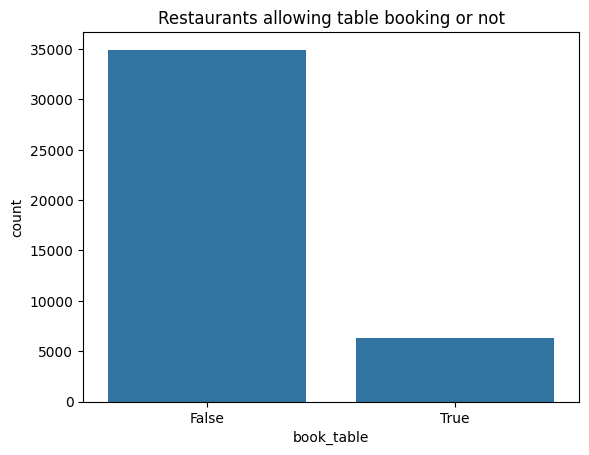

In [22]:
sns.countplot(x = zomato_df["book_table"])
plt.title("Restaurants allowing table booking or not")

#### ● Table booking Rate vs Rate

<Figure size 1500x700 with 0 Axes>

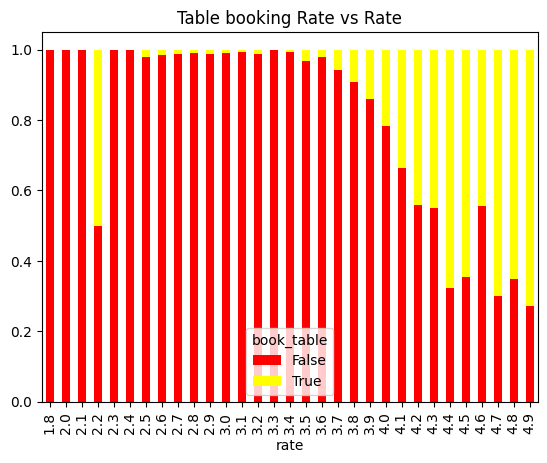

In [23]:
plt.figure(figsize=(15, 7))
y = pd.crosstab(zomato_df["rate"], zomato_df['book_table'])
y.div(y.sum(1).astype(float), axis = 0).plot(kind= "bar", stacked= True, color = ["red", "yellow"])
plt.title("Table booking Rate vs Rate")
plt.show()

####  Best Location


C:\Users\sagar\AppData\Local\Temp\ipykernel_9492\3422932868.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Text(0.5, 1.0, 'Best location')

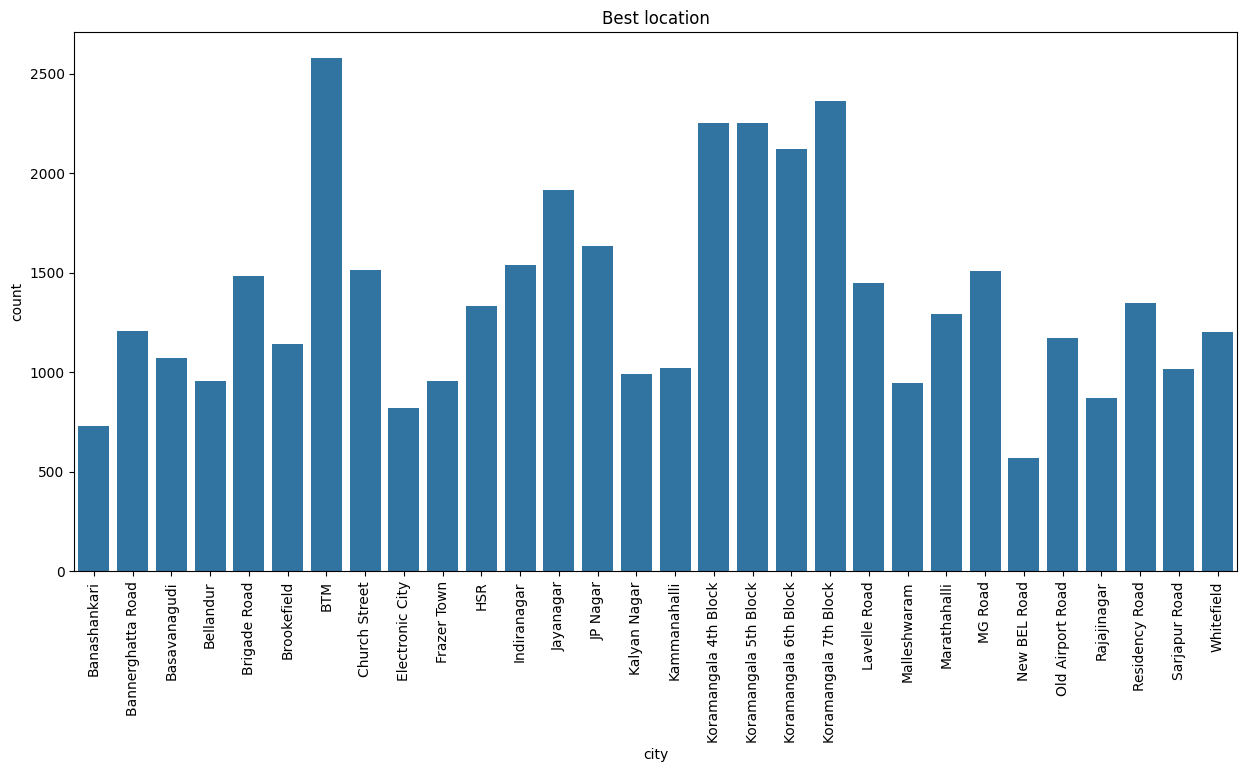

In [24]:
plt.figure(figsize=(15, 7))
sns.countplot(x = zomato_df["city"])
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.show()
plt.title("Best location")

#### ● Relation between Location and Rating


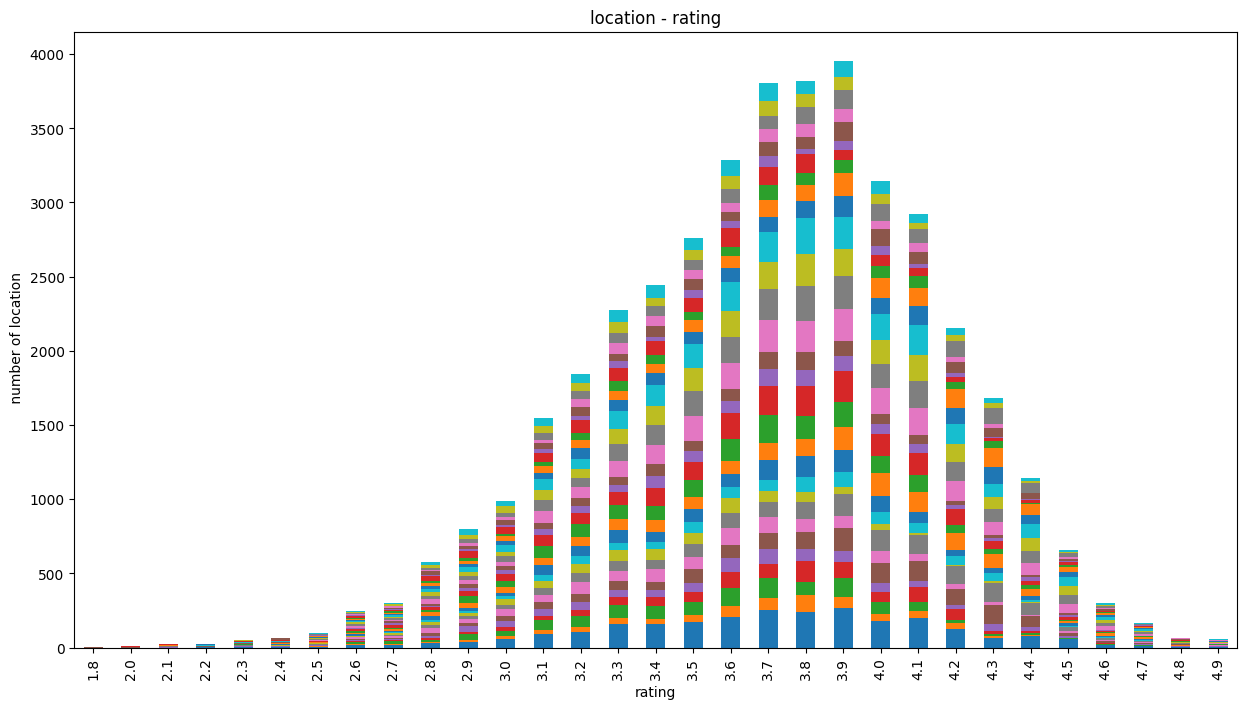

In [25]:
loc_plt = pd.crosstab(zomato_df["rate"], zomato_df["city"])
loc_plt.plot(kind= "bar", stacked= True, figsize=(15, 8))
plt.title("location - rating")
plt.xlabel("rating")
plt.ylabel(" number of location")
plt.legend().remove()

#### ● Restaurant Type

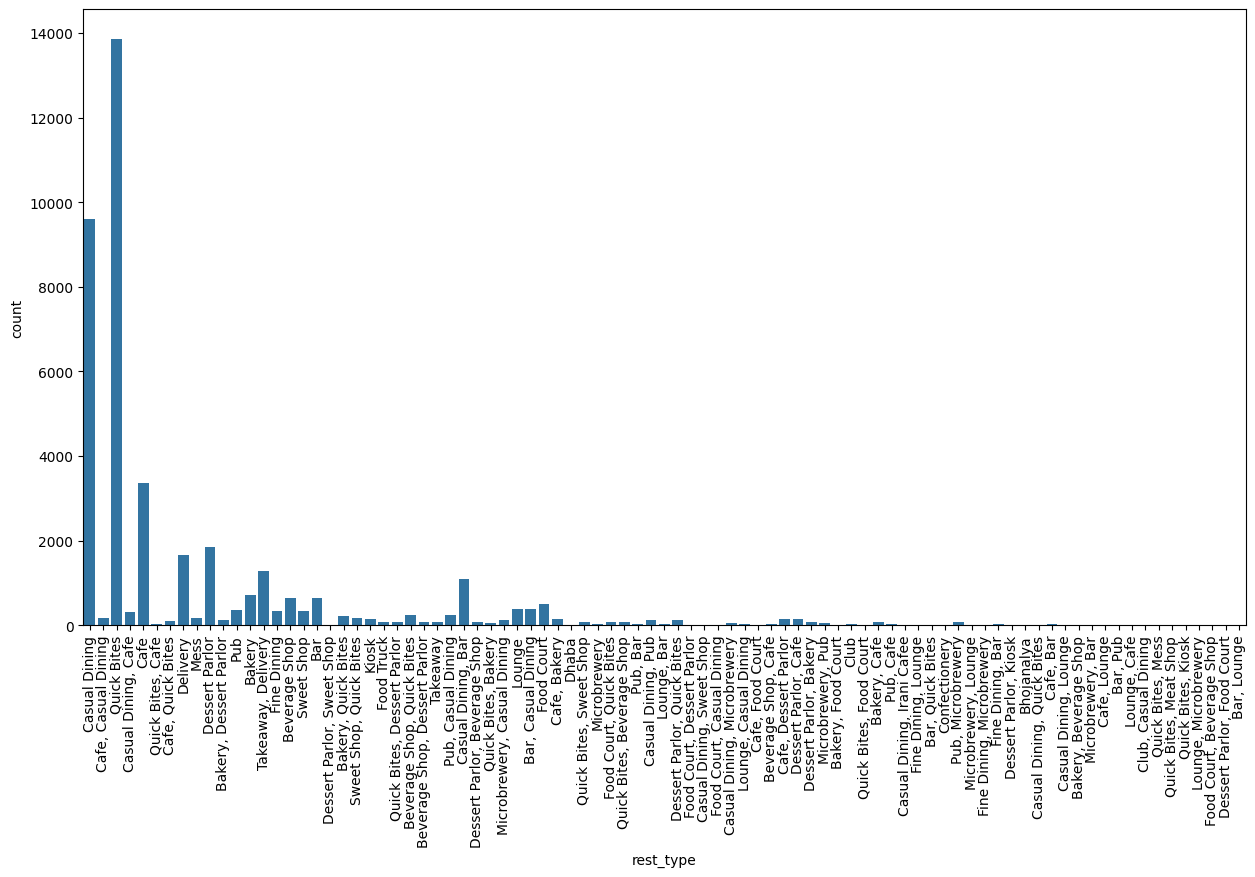

Text(0.5, 1.0, 'resturant type')

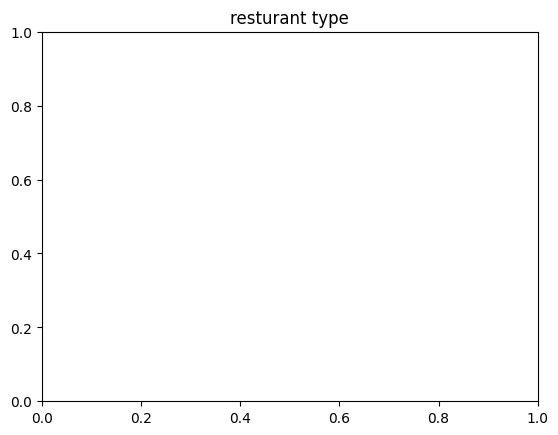

In [26]:
plt.figure(figsize= (15, 8))
sns.countplot(x = zomato_df["rest_type"])
plt.gcf()
plt.xticks(rotation = 90)
plt.show()
plt.title("resturant type")

#### ● Gaussian Rest type and Rating


Text(0.5, 1.0, 'rating - rest type')

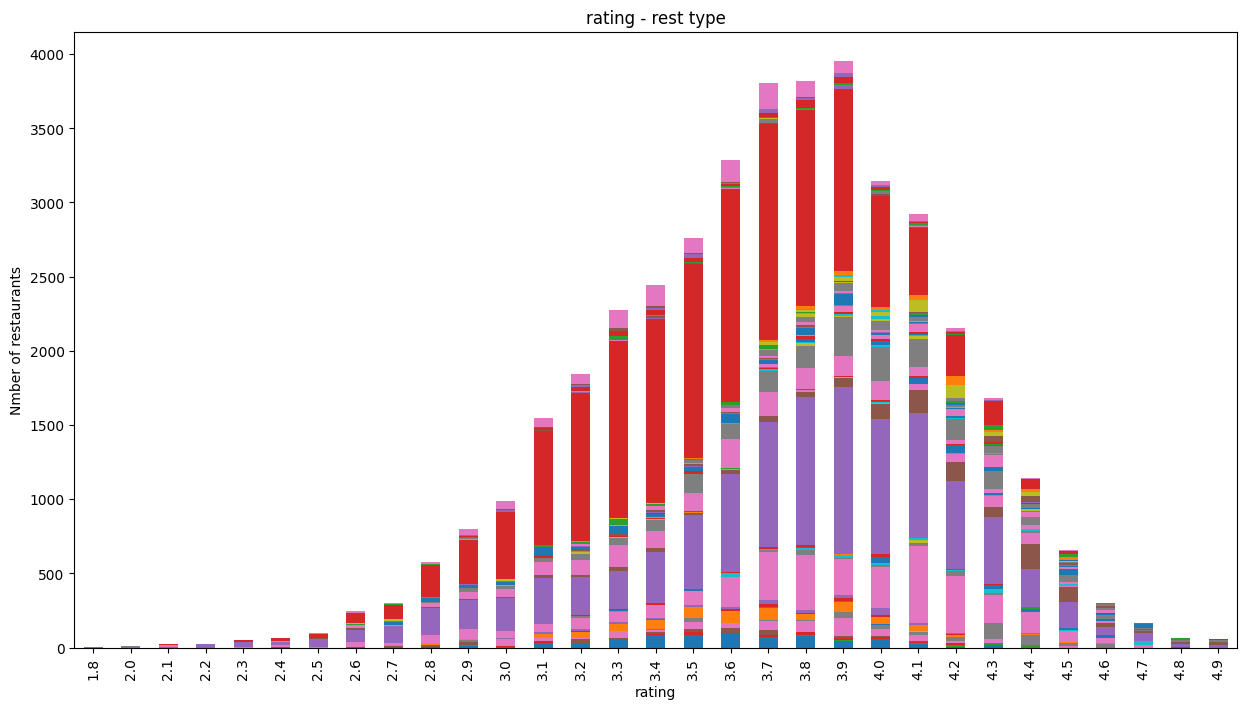

In [27]:
loc_plt = pd.crosstab(zomato_df["rate"], zomato_df["rest_type"])
loc_plt.plot(kind= "bar", stacked= True, figsize= (15, 8))
plt.xlabel("rating")
plt.ylabel("Nmber of restaurants")
plt.legend().remove()
plt.title("rating - rest type")

#### ● Types of Services


Text(0.5, 1.0, 'services')

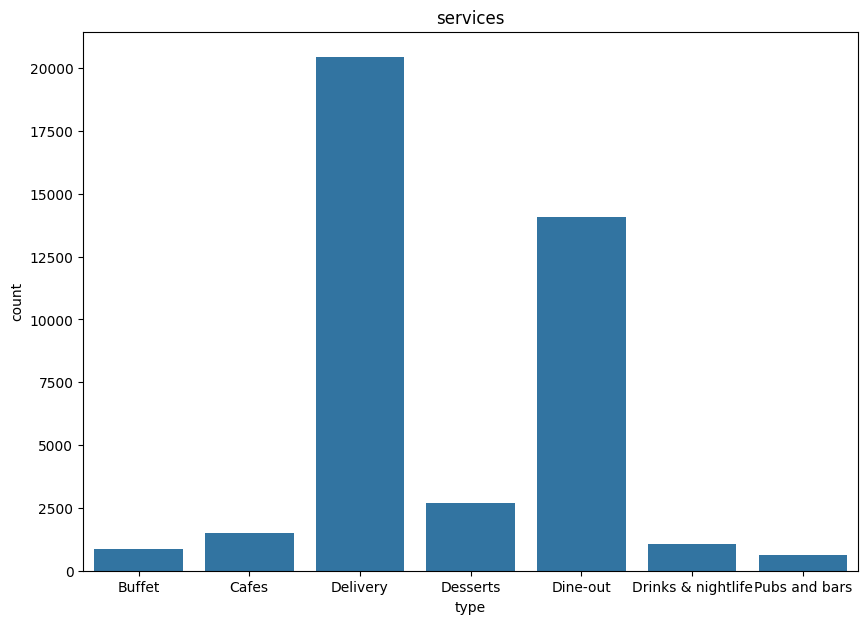

In [28]:
plt.figure(figsize=(10, 7))
sns.countplot(x = zomato_df["type"])
plt.title("services")


#### ● Relation between Type and Rating


Text(0.5, 1.0, 'Type - RAting')

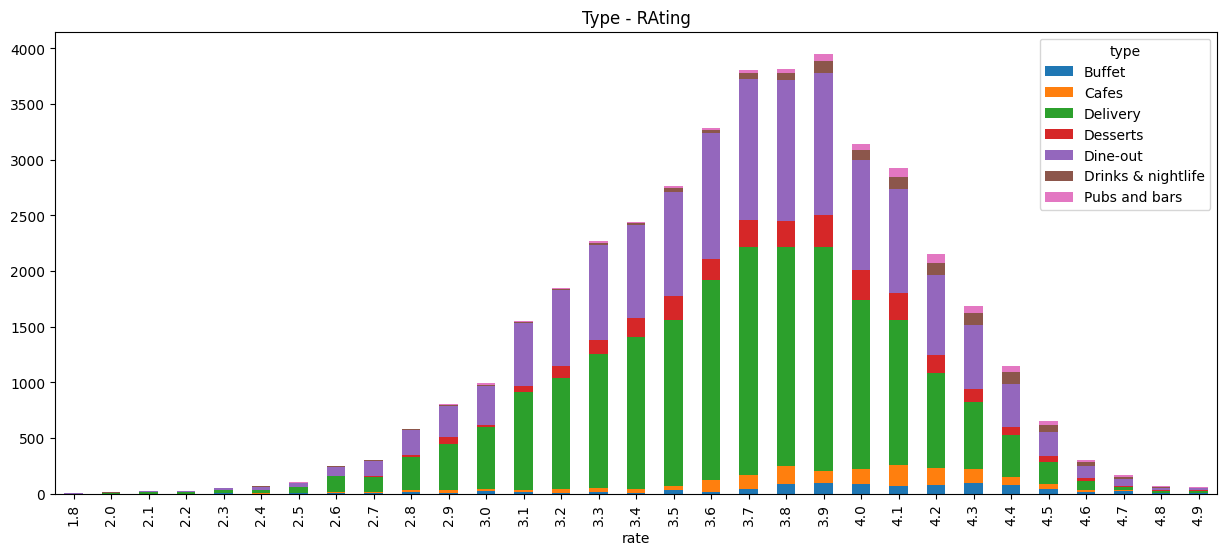

In [29]:
type_plt = pd.crosstab(zomato_df["rate"], zomato_df["type"])
type_plt.plot(kind= "bar", stacked= True, figsize= (15, 6))
plt.title("Type - RAting")

#### ● Cost of Restaurant


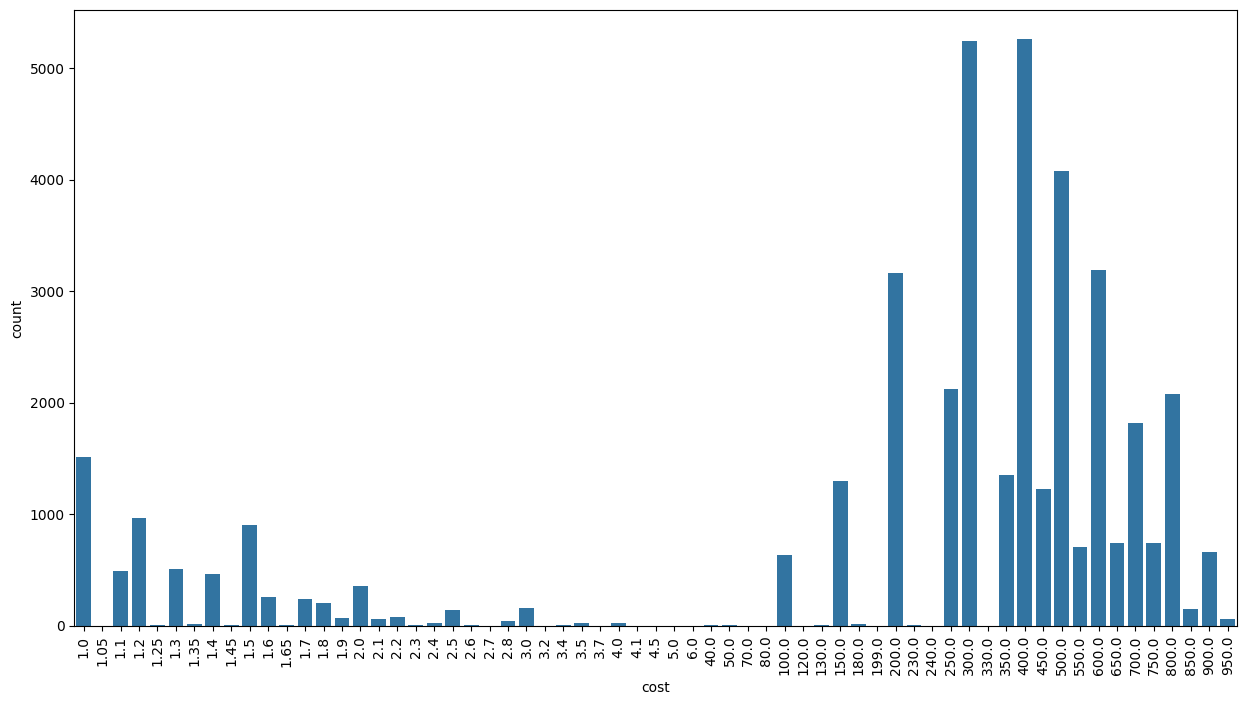

In [30]:
plt.figure(figsize=(15, 8))
sns.countplot(x = zomato_df["cost"])
plt.xticks(rotation = 90)
plt.show()

#### ● No. of restaurants in a Location


<Axes: title={'center': 'Number of Location'}, xlabel='location', ylabel='count'>

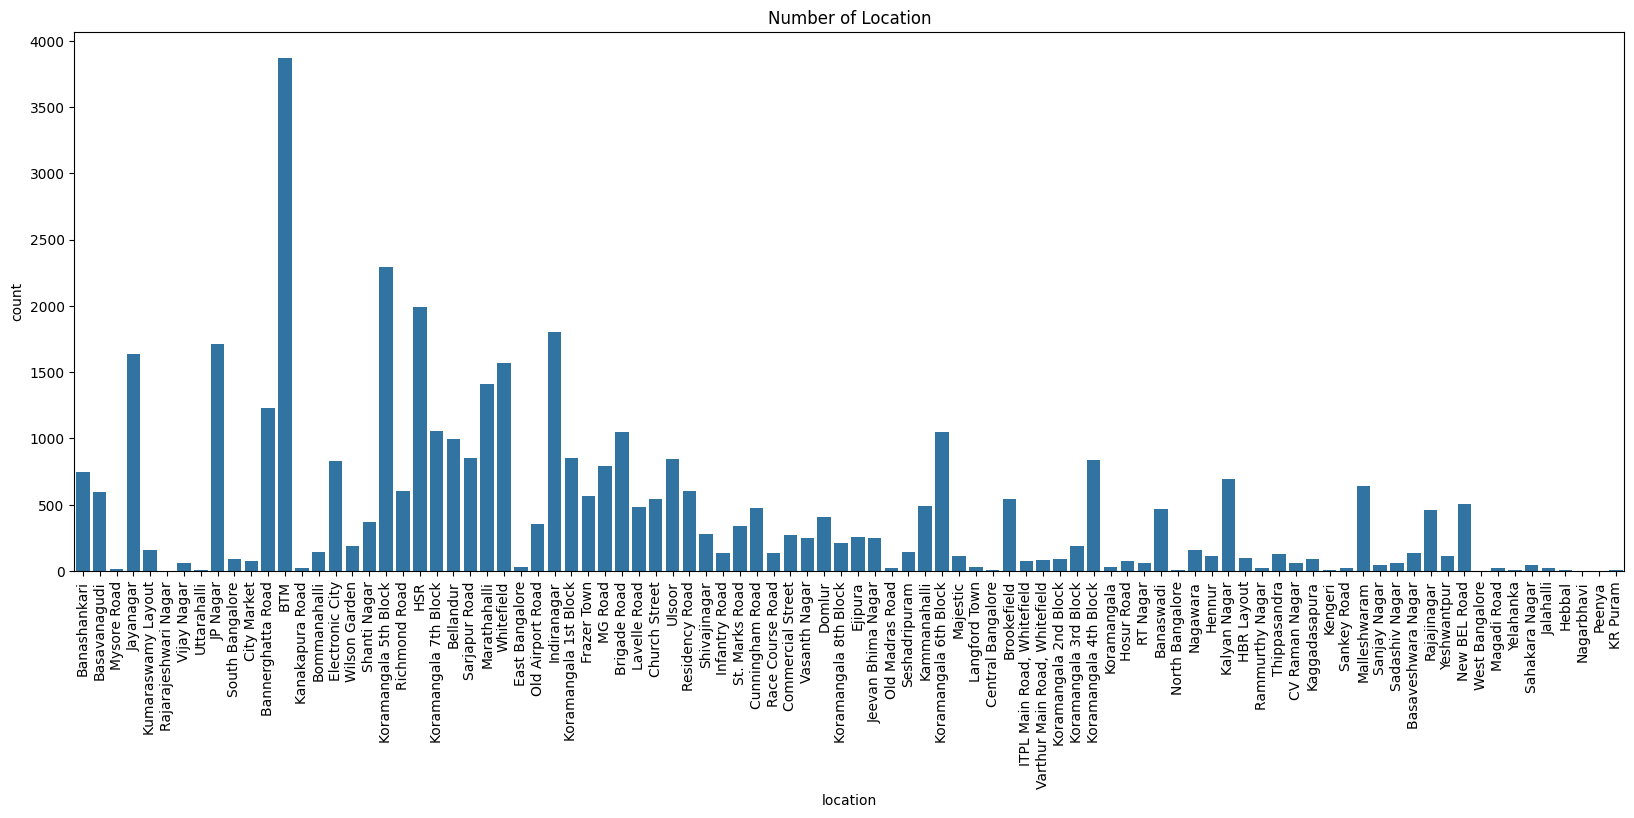

In [31]:
fig = plt.figure(figsize=(20, 7))
loc = sns.countplot(x = zomato_df["location"])
plt.xticks(rotation = 90)
plt.title("Number of Location")
loc

#### ● Restaurant type

<Axes: title={'center': 'Number of Location'}, xlabel='rest_type', ylabel='count'>

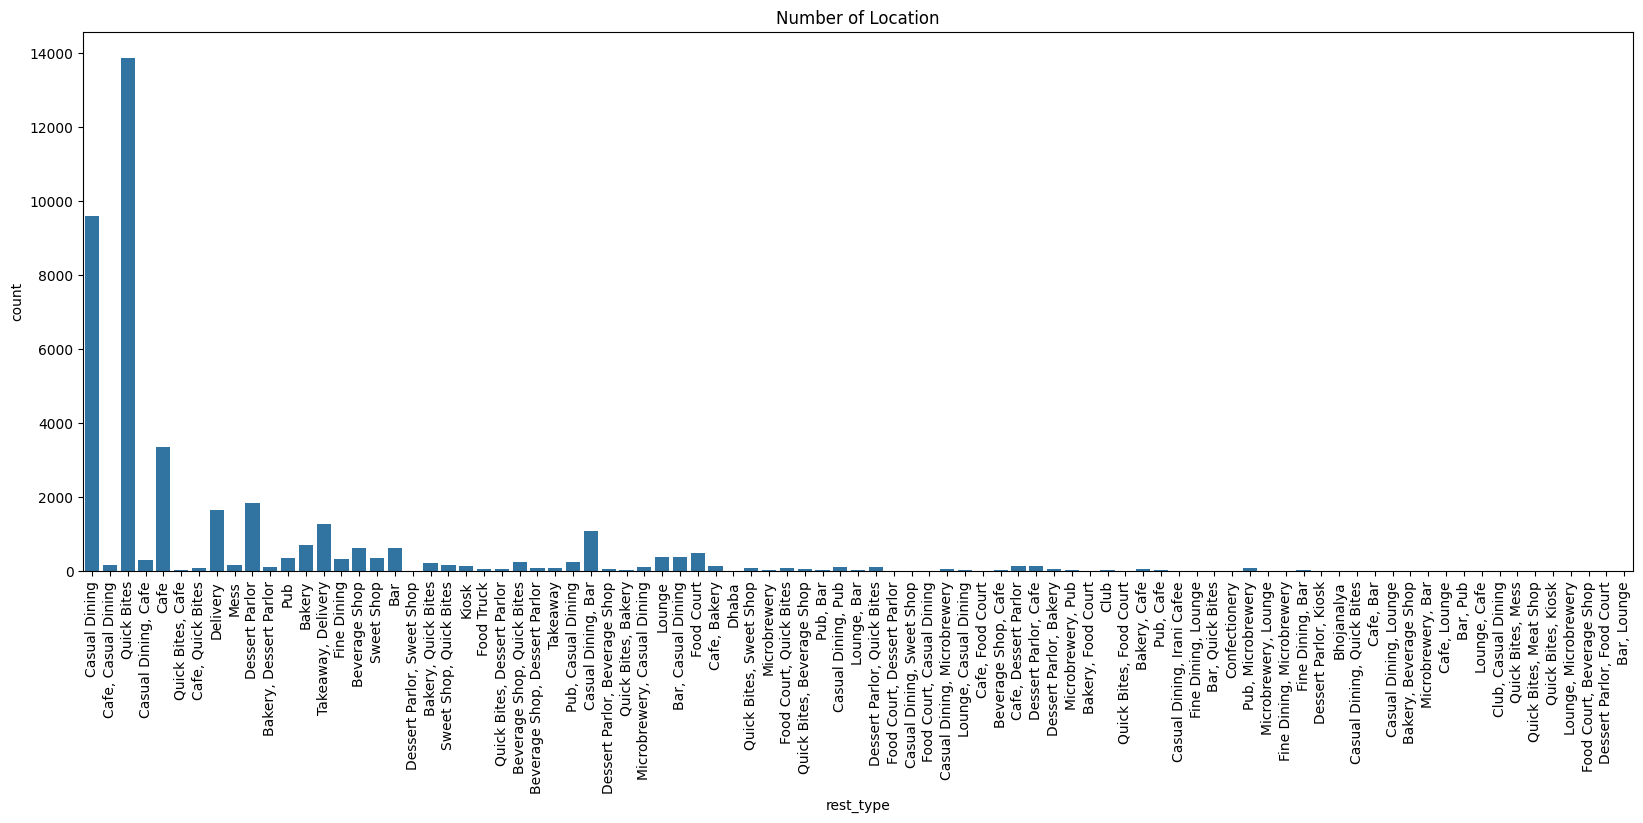

In [32]:
fig = plt.figure(figsize=(20, 7))
loc = sns.countplot(x = zomato_df["rest_type"])
plt.xticks(rotation = 90)
plt.title("Number of Location")
loc

#### ● Most famous restaurant chains in Bengaluru

C:\Users\sagar\AppData\Local\Temp\ipykernel_9492\2993382730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = chains, y = chains.index, palette= "Set1")


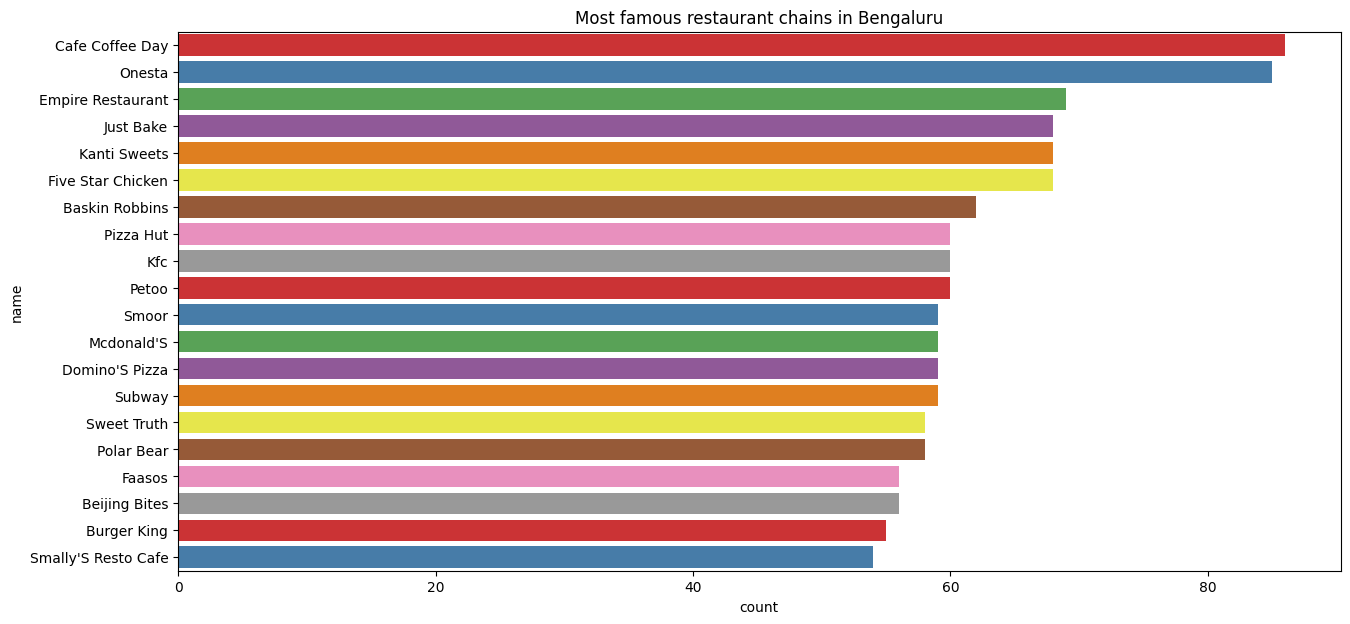

In [33]:
plt.figure(figsize=(15, 7))
chains = zomato_df["name"].value_counts()[:20]
sns.barplot(x = chains, y = chains.index, palette= "Set1")
plt.title("Most famous restaurant chains in Bengaluru")
plt.show()

# Machine LEarning part

In [69]:
zomato_df_1 = zomato_df.drop(columns= ["address", "name", "reviews_list", "menu_item","city"])

In [85]:
zomato_df_1.to_csv("zomato_df_1.csv")

In [70]:
# encode the input variables:
def encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(["rate", "cost","votes"])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = encode(zomato_df_1.copy())

In [71]:
zomato_en

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,0,0,4.1,775,0,0,0,800.0,0
1,0,1,4.1,787,0,0,1,800.0,0
2,0,1,3.8,918,0,1,2,800.0,0
3,1,1,3.7,88,0,2,3,300.0,0
4,1,1,3.8,166,1,0,4,600.0,0
...,...,...,...,...,...,...,...,...,...
41232,1,1,3.7,34,25,28,204,800.0,6
41233,1,1,2.5,81,25,28,761,800.0,6
41234,1,1,3.6,27,25,17,240,1.5,6
41235,1,0,4.3,236,56,17,237,2.5,6


In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [72]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= zomato_en.drop(columns=["rate"], axis=1)
  y= zomato_en["rate"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [73]:
print(accuracy_regressor(zomato_en, DecisionTreeRegressor))
print(accuracy_regressor(zomato_en, RandomForestRegressor))
print(accuracy_regressor(zomato_en, ExtraTreesRegressor))
print(accuracy_regressor(zomato_en, AdaBoostRegressor))
print(accuracy_regressor(zomato_en, GradientBoostingRegressor))
print(accuracy_regressor(zomato_en, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.999374899764328, 'R2_Test': 0.8905785735565904}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9895983509696947, 'R2_Test': 0.9254462953110292}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.999374899764328, 'R2_Test': 0.9302705914687219}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.2623654931868622, 'R2_Test': 0.25981151845235173}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.5303006960366705, 'R2_Test': 0.5266221040169945}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.8114862852870577, 'R2_Test': 0.7607203135434181}


In [38]:
# selecting random forest

In [74]:
x= zomato_en.drop(columns=["rate"], axis=1)
y= zomato_en["rate"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor().fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9258737671843988,
 'Mean Absolute Error': np.float64(0.052961253361966415),
 'Mean Squared Error': np.float64(0.014285838444818563),
 'Root Mean Squared Error': np.float64(0.11952338032710823)}

In [75]:
zomato_en.head(1)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,0,0,4.1,775,0,0,0,800.0,0


In [ ]:
0, 0,775, 0, 0 , 0, 800.0, 0

In [81]:
user_data = np.array([[1, 0,1500, 7, 2 , 8, 777.0, 1]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  4.15935
Predicted selling price without Log:  64.02988964242368


d:\car insurance claim\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [82]:
zomato_en.tail(1)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
41236,1,1,3.4,13,56,33,1870,1.5,6


In [84]:
user_data = np.array([[1, 1,13, 56, 33, 1870, 1.5, 6 ]])
y_pred = model_r.predict(user_data)
print(y_pred[0])

3.3944999999999976


d:\car insurance claim\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [87]:
import pickle

In [88]:
with open("model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [90]:
with open("model.pkl","rb") as r1:
  random_forest=pickle.load(r1)